In [1]:
import pandas as pd
import pvtools.pv_curve as pvc
import logging

logging.basicConfig(level=logging.INFO)

## 1. Reading in from file directly
Here is some example data that collected for a leaf sample from a Eucalyptus globulus on UCSB's campus, stored on the data collection template provided with this package. pvtools will automatically guess which columns in the spreadsheet correspond to the water potential, wet mass, and dry mass data. 

INFO:root:No value given for psi_column. Using column 'Y (Mpa)' for Ψ values...
INFO:root:Assuming Ψ units are in MPa.
INFO:root:No value given for mass_column. Using column 'Mass (g)' for mass values...
INFO:root:Assuming mass units are in grams.
 7.176524251178364]...). Using the first value.
INFO:root:Using dry mass value of 0.9199 from 'Dry Weight (g)' column.
INFO:root:No unit for dry mass found. Assuming dry mass units are the same as mass units.
INFO:root:No breakpoint provided. Calculating breakpoint...
c:\Users\jeanallen\Miniconda3\envs\pvtools_dev\Lib\site-packages\statsmodels\regression\linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
INFO:root:Breakpoint found at index 18 with R² of 0.991


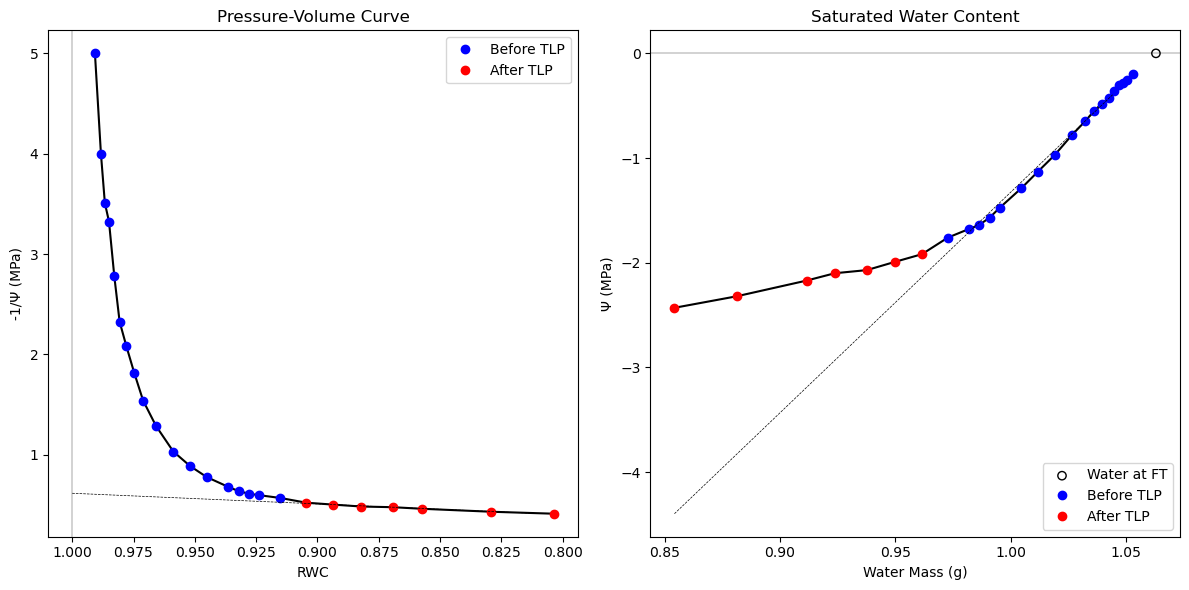

In [2]:
eugl = pvc.read('eugl_1.xlsx')
eugl.plot()

pvtools assumes you're using MPa and grams as your units, but if not, you can specify your units in the read function like this:

In [3]:
eugl = pvc.read('eugl_1.xlsx', psi_units='MPa', mass_units='g')

INFO:root:No value given for psi_column. Using column 'Y (Mpa)' for Ψ values...
INFO:root:No value given for mass_column. Using column 'Mass (g)' for mass values...
 7.176524251178364]...). Using the first value.
INFO:root:Using dry mass value of 0.9199 from 'Dry Weight (g)' column.
INFO:root:No unit for dry mass found. Assuming dry mass units are the same as mass units.
INFO:root:No breakpoint provided. Calculating breakpoint...
c:\Users\jeanallen\Miniconda3\envs\pvtools_dev\Lib\site-packages\statsmodels\regression\linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
INFO:root:Breakpoint found at index 18 with R² of 0.991


Calculated values (e.g., TLP) are stored as attributes of the PVCurve object:

In [4]:
print('Water Potentials (MPa):', eugl.psis)
print('Wet Masses (g):', eugl.masses)
print('Relative Water Contents:', eugl.rwc)
print('\n')

print('Turgor Loss Point (MPa):', eugl.tlp)
print('Turgor Loss Point Confidence Interval (MPa):', eugl.tlp_conf_int)
print('Saturated Water Content:', eugl.swc)
print('Bulk elastic modulus (MPa):', eugl.bulk_elastic_total)

Water Potentials (MPa): [-0.2   -0.25  -0.285 -0.301 -0.36  -0.43  -0.48  -0.55  -0.65  -0.778
 -0.97  -1.129 -1.288 -1.475 -1.57  -1.64  -1.678 -1.76  -1.918 -1.99
 -2.07  -2.1   -2.17  -2.32  -2.43 ]
Wet Masses (g): [1.9731 1.9705 1.9688 1.967  1.9647 1.9624 1.9595 1.9561 1.9522 1.9466
 1.9391 1.9318 1.9246 1.9152 1.9108 1.9062 1.9018 1.8927 1.8815 1.87
 1.8576 1.8437 1.8315 1.8012 1.7742]
Relative Water Contents: [0.99073871 0.98829291 0.98669373 0.98500048 0.98283688 0.98067329
 0.97794528 0.97474692 0.97107821 0.96581033 0.95875512 0.95188806
 0.94511506 0.93627254 0.93213349 0.9278063  0.92366724 0.91510693
 0.90457116 0.89375318 0.88208858 0.86901293 0.85753647 0.82903345
 0.80363471]


Turgor Loss Point (MPa): -1.8956431691065294
Turgor Loss Point Confidence Interval (MPa): (-1.9075384683267718, -1.883747869886287)
Saturated Water Content: 1.155609488530863
Bulk elastic modulus (MPa): 19.081690369387644


The breakpoint between the two regimes (pre- and post-TLP) is calculated by maximizing the weighted R² between the two sides. If you want to see how the breakpoint used affected your results, you can call the "get_breakpoint" function explicitly and plot how the weighted R² and the turgor loss point would vary based on this choice. In this dataset we get the maximum weighted R² with 18 points pre-TLP and 7 points post-TLP:

c:\Users\jeanallen\Miniconda3\envs\pvtools_dev\Lib\site-packages\statsmodels\regression\linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


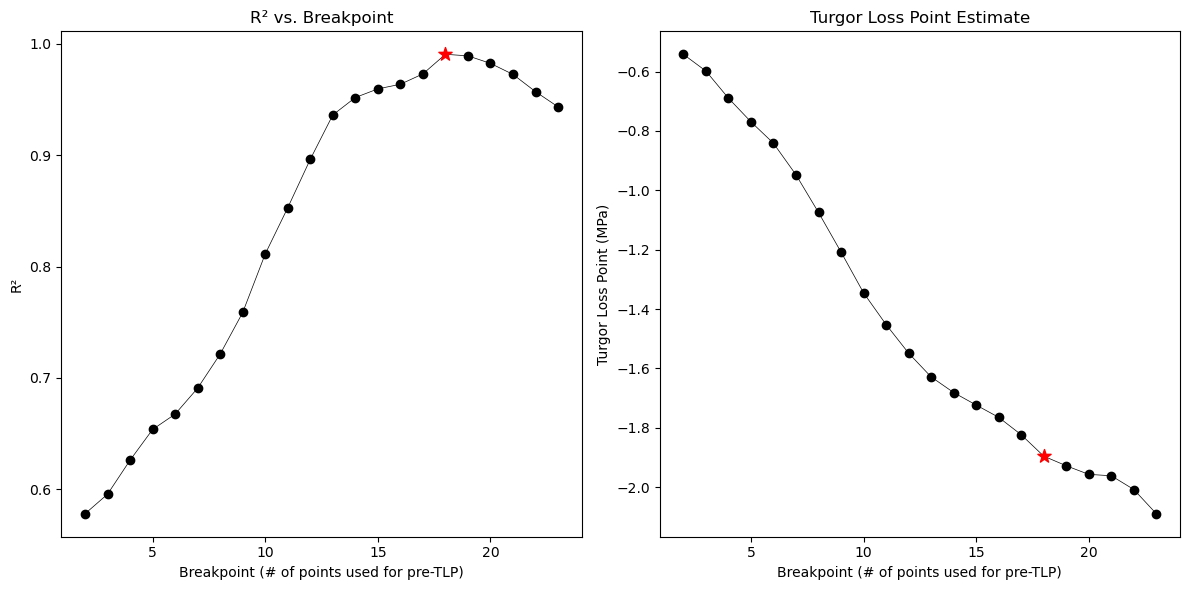

INFO:root:Breakpoint found at index 18 with R² of 0.991


In [5]:
breakpoint = eugl.get_breakpoint(plot=True)

If you want, you can manually set the breakpoint by specifying it in the function. E.g., if we want to move two of the "pre-TLP" points to "post-TLP", we can specify the breakpoint to be 2 fewer, e.g.:

INFO:root:No value given for psi_column. Using column 'Y (Mpa)' for Ψ values...
INFO:root:Assuming Ψ units are in MPa.
INFO:root:No value given for mass_column. Using column 'Mass (g)' for mass values...
INFO:root:Assuming mass units are in grams.
 7.176524251178364]...). Using the first value.
INFO:root:Using dry mass value of 0.9199 from 'Dry Weight (g)' column.
INFO:root:No unit for dry mass found. Assuming dry mass units are the same as mass units.


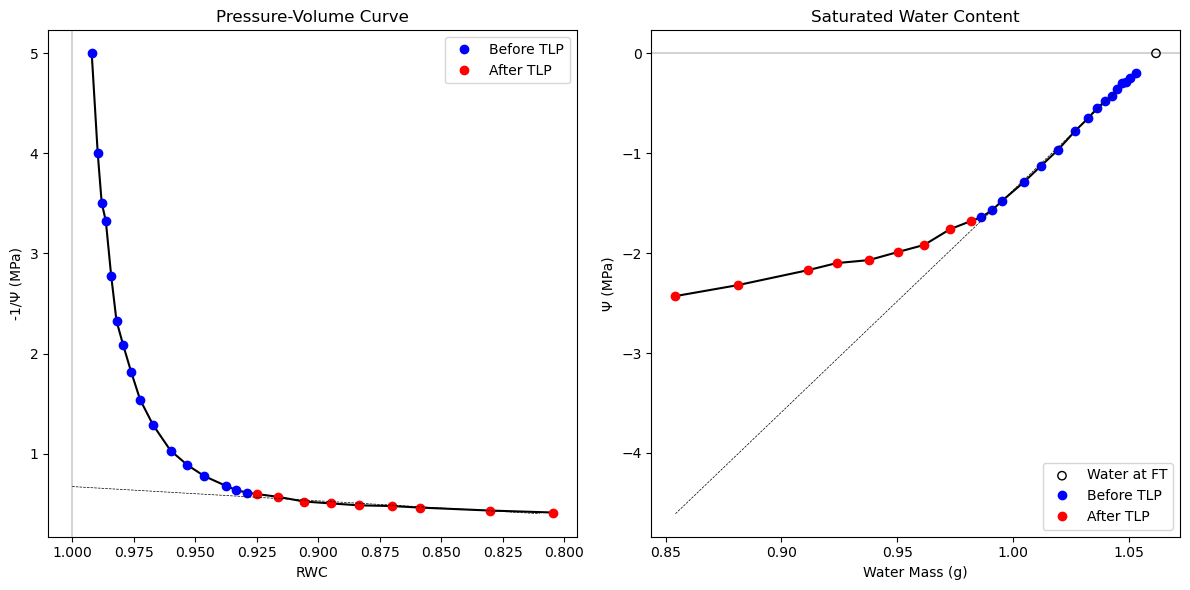

New Turgor Loss Point (MPa): -1.7648541768304362


In [6]:
eugl = pvc.read('eugl_1.xlsx', bkp=16)
eugl.plot()
print('New Turgor Loss Point (MPa):', eugl.tlp)

## 2. Inputting Data Manually
If you already have your psi/mass data loaded into python as numpy arrays or something like that, you can just create PVCurve objects using the data directly. E.g.:

INFO:root:No breakpoint provided. Calculating breakpoint...
c:\Users\jeanallen\Miniconda3\envs\pvtools_dev\Lib\site-packages\statsmodels\regression\linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
INFO:root:Breakpoint found at index 18 with R² of 0.991


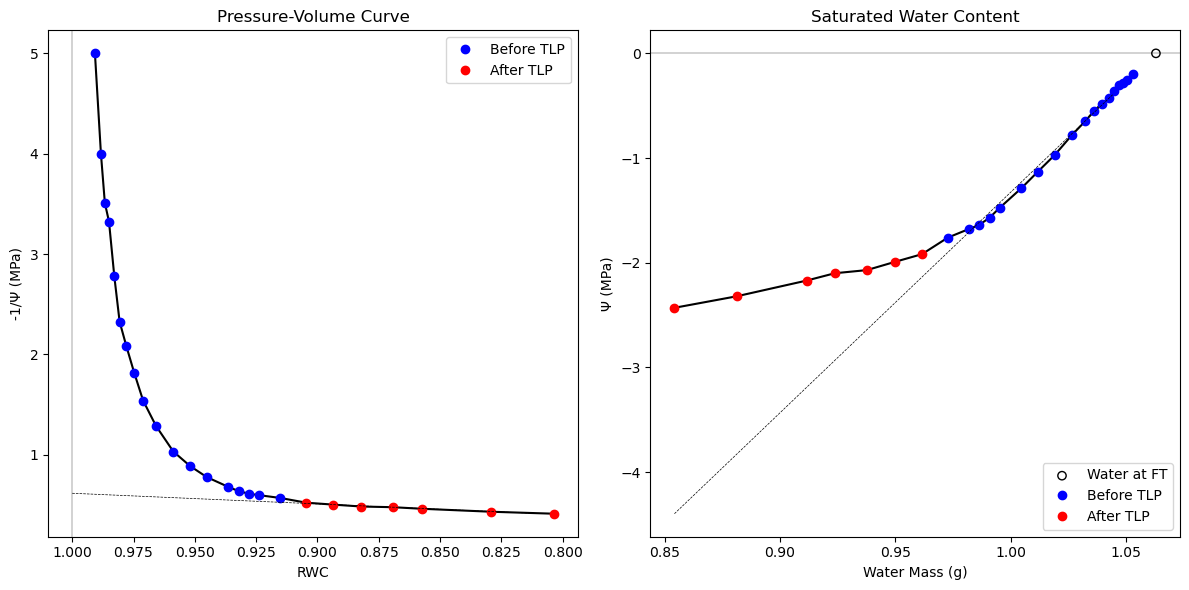

In [7]:
# load in data from Excel file and extract psi/mass/dry_mass data
data = pd.read_excel('eugl_1.xlsx')
psis = data['Y (Mpa)'].dropna().values
masses = data['Mass (g)'].dropna().values
dry_mass = data['Dry Weight (g)'][0] 

# input data into PVCurve object and plot...
eugl_from_data = pvc.PVCurve(psis, masses, dry_mass)
eugl_from_data.plot()

## 3. Outlier Removal
I've implemented a couple automated outlier detection and removal algorithms, mostlymeant to catch major transcription errors. This is still a bit of an experimental feature -- I've tested it on a couple datasets and it's been reliable, but use at your own risk.

INFO:root:Detected 1 outlier(s) using regression method.
INFO:root:Recalculating breakpoint after outlier removal...
INFO:root:No breakpoint provided. Calculating breakpoint...
c:\Users\jeanallen\Miniconda3\envs\pvtools_dev\Lib\site-packages\statsmodels\regression\linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
INFO:root:Breakpoint found at index 17 with R² of 0.990


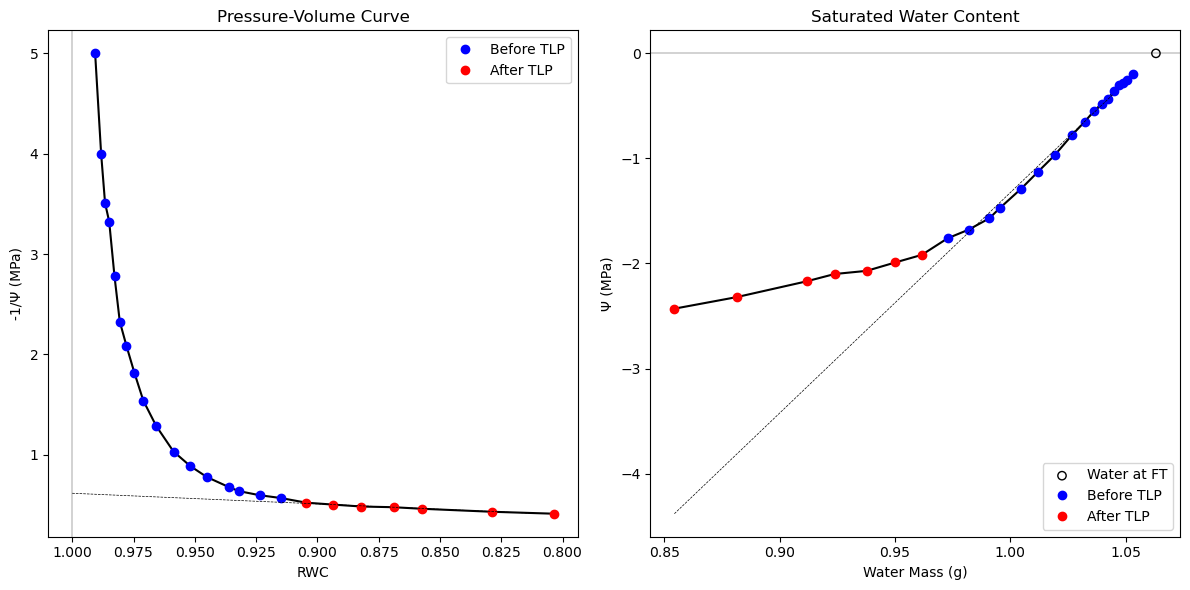

In [8]:
# the first outlier removal method is based on confidence intervals around the two linear regressions
# the default confidence interval size is 95%, but in this dataset we don't drop anything unless we use 90% or below
eugl_no_outliers = eugl.remove_outliers(method='regression', alpha=0.1)
eugl_no_outliers.plot()

INFO:root:Detected 0 outlier(s) using local MAD method.
INFO:root:Recalculating breakpoint after outlier removal...
INFO:root:No breakpoint provided. Calculating breakpoint...
c:\Users\jeanallen\Miniconda3\envs\pvtools_dev\Lib\site-packages\statsmodels\regression\linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
INFO:root:Breakpoint found at index 18 with R² of 0.991


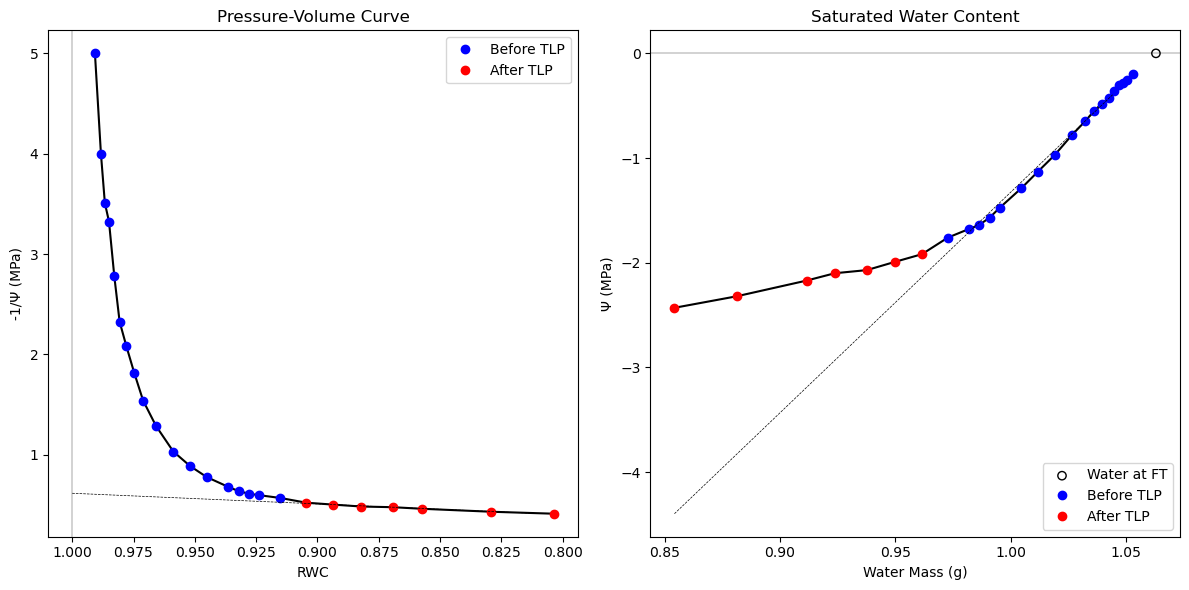

In [9]:
# the second outlier removal method is based on median absolute deviation
# I actually can't get this dataset to drop any outliers using this method, but here's how you'd call it:
eugl_no_outliers_mad = eugl.remove_outliers(method='local_mad')
eugl_no_outliers_mad.plot()

## 4. Exporting Data
You can also export your processed data into a very ugly-but-functional csv or excel spreadsheet. Note that we didn't specify a leaf area, so some area-based metrics will be recorded as NaN:

In [10]:
eugl.save_csv('eugl_processed.csv')

INFO:root:Data saved to c:\Users\jeanallen\Desktop\pvtools\tests\eugl_processed.csv


That's about it :) Happy plotting!